<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Obiettivo:** creare un modello predittivo per risolvere un problema di classificazione attraverso l'utilizzo di KNN, seguendo la pipeline vista a lezione.
 

**Dataset:**
Il dataset da utilizzare contiene i risultati dell’analisi chimica di vini prodotti da tre diversi coltivatori Italiani: dovrai capire il tipo di vino a partire dai suoi valori chimici.

Puoi caricare il dataset direttamente dalla libreria di Scikit-learn: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset.

In [1]:
#KNN wine dataset
#Import Libraries
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Import load_wine from sklearn datasets

wine_dataset = datasets.load_wine()
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
#Converto il i dati importati in un dataframe per facilitare la visualizzazione

df = pd.DataFrame(data=wine_dataset.data, 
                  columns=wine_dataset.feature_names)
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

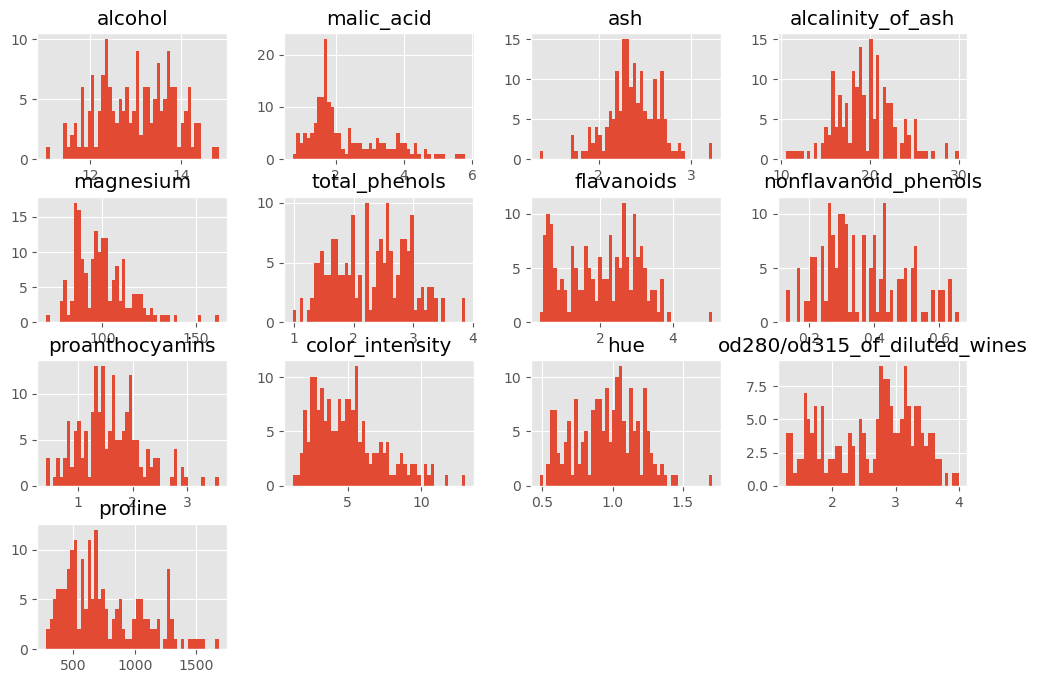

In [16]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [39]:
corr_matrix = df.corr()
corr_matrix.sort_values('total_phenols', ascending=False)

#è presente una correlazione lineare alta fra flavanoids e total_phenols

alcohol  malic_acid       ash  \
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proanthocyanins               0.136698   -0.220746  0.009652   
proline                       0.643720   -0.192011  0.223626   
hue                          -0.071747   -0.561296 -0.074667   
alcohol                       1.000000    0.094397  0.211545   
magnesium                     0.270798   -0.054575  0.286587   
ash                           0.211545    0.164045  1.000000   
color_intensity               0.546364    0.248985  0.258887   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
malic_acid                    0.094397    1.000000  0.164045   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   

                              alcalinity_of_ash  magnesium  total_phenols  \
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proanthocyanins                       -0.197327   0.236441       0.612413   
proline                               -0.440597   0.393351       0.498115   
hue                                   -0.273955   0.055398       0.433681   
alcohol                               -0.310235   0.270798       0.289101   
magnesium                             -0.083333   1.000000       0.214401   
ash                                    0.443367   0.286587       0.128980   
color_intensity                        0.018732   0.199950      -0.055136   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
malic_acid                             0.288500  -0.054575      -0.335167   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   

                              flavanoids  nonflavanoid_phenols  \
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proanthocyanins                 0.652692             -0.365845   
proline                         0.494193             -0.311385   
hue                             0.543479             -0.262640   
alcohol                         0.236815             -0.155929   
magnesium                       0.195784             -0.256294   
ash                             0.115077              0.186230   
color_intensity                -0.172379              0.139057   
alcalinity_of_ash              -0.351370              0.361922   
malic_acid                     -0.411007              0.292977   
nonflavanoid_phenols           -0.537900              1.000000   

                              proanthocyanins  color_intensity       hue  \
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proanthocyanins                      1.000000        -0.025250  0.295544   
proline                              0.330417         0.316100  0.236183   
hue                                  0.295544        -0.521813  1.000000   
alcohol                              0.136698         0.546364 -0.071747   
magnesium                            0.236441         0.199950  0.055398   
ash                                  0.009652         0.258887 -0.074667   
color_intensity                     -0.025250         1.000000 -0.521813   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
malic_acid                          -0.220746         0.248985 -0.561296   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   

                              od280/od315_of_diluted_wines   prol

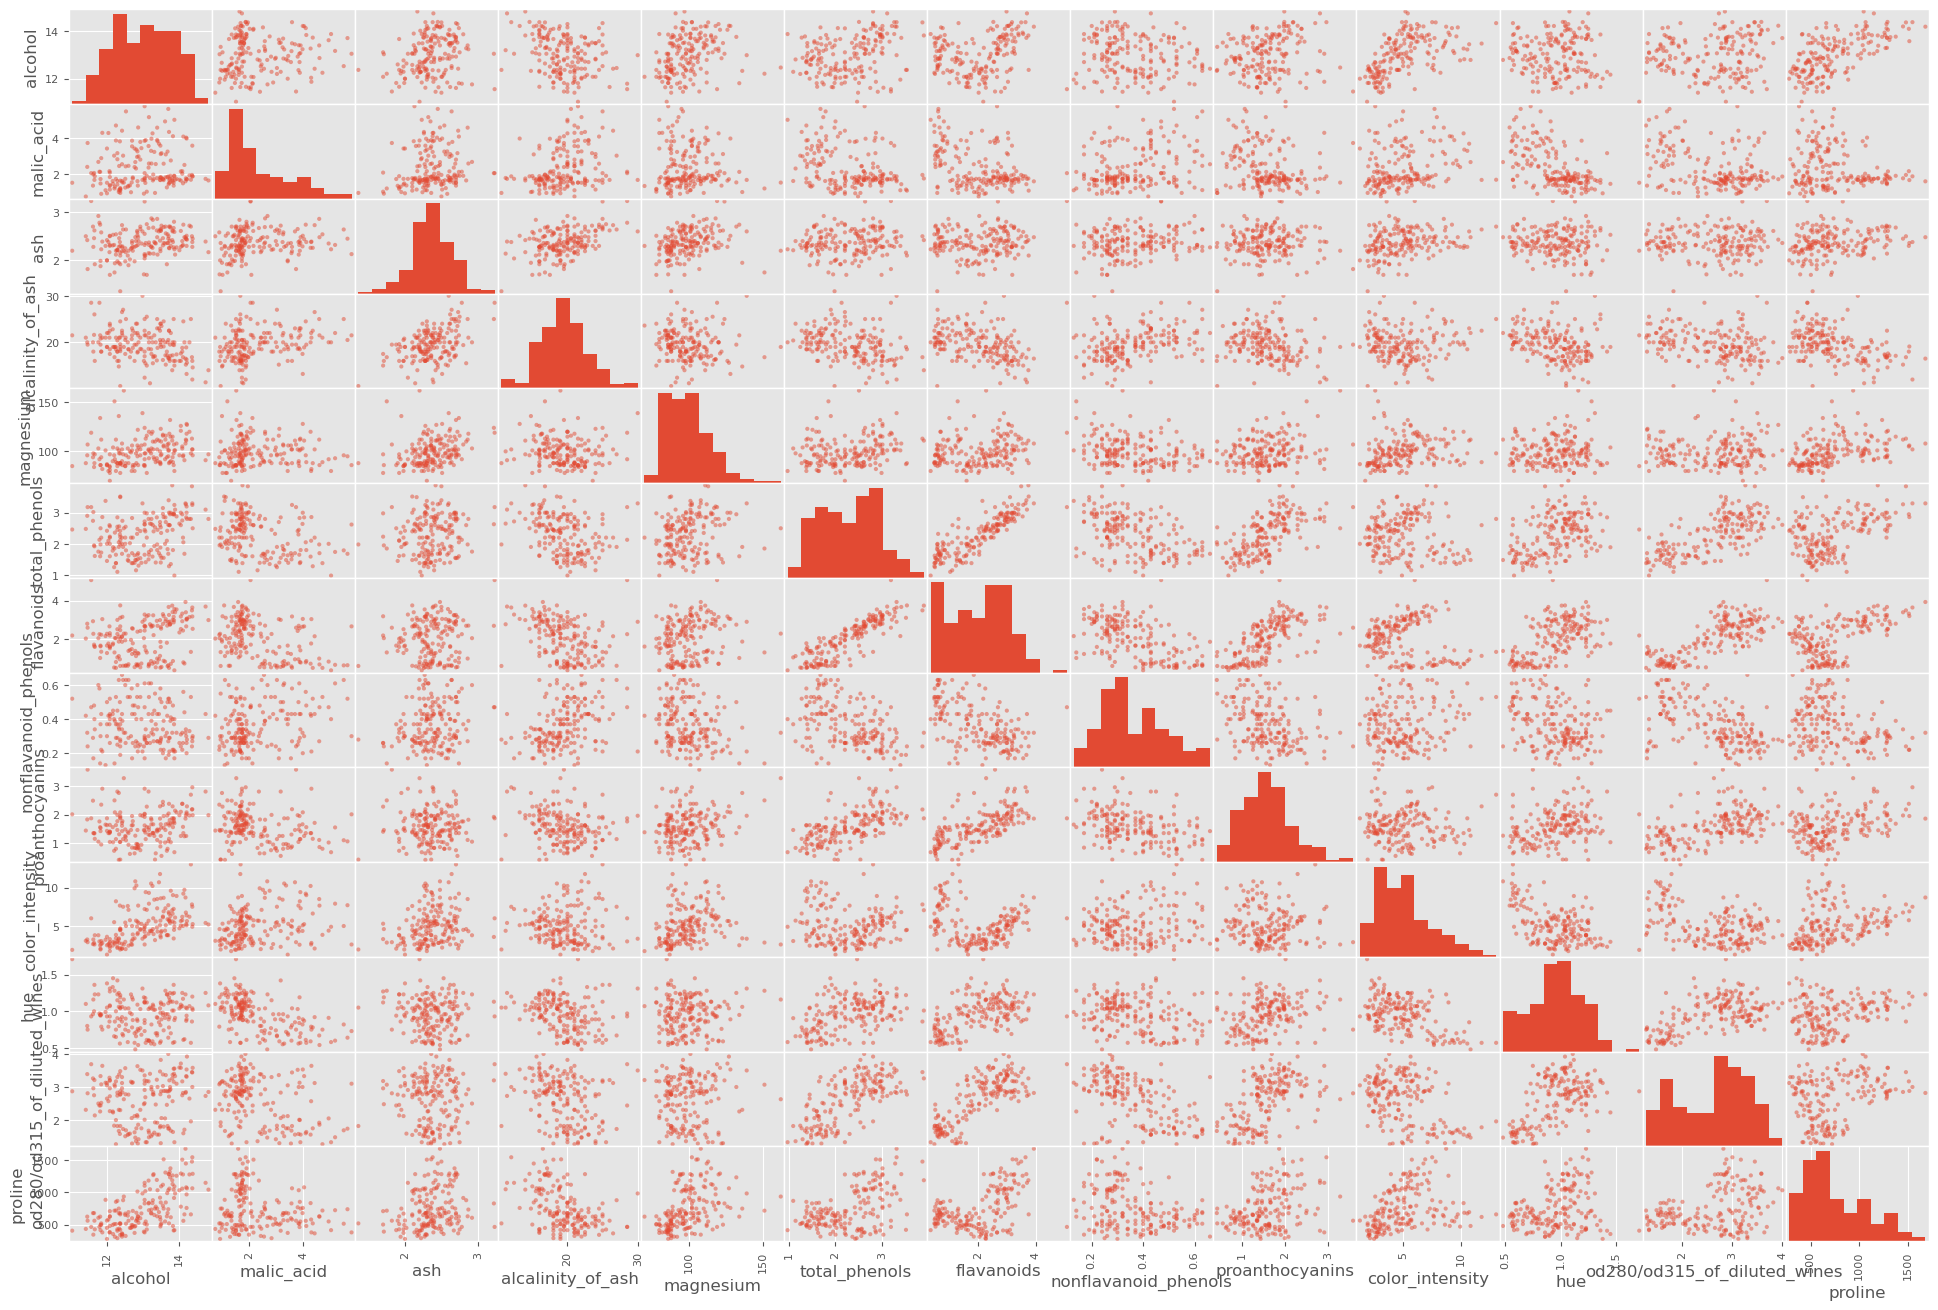

In [28]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(24, 16))
plt.show()

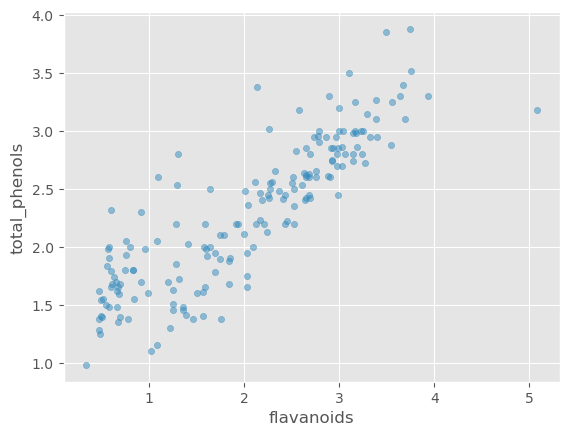

In [44]:
df.plot(kind="scatter", x="flavanoids", y="total_phenols",
             alpha=0.5, grid=True)
plt.show()

In [5]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], 
                                                    test_size=0.3, random_state=0)

In [6]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (124, 13)
y_train shape: (124,)
X_test shape: (54, 13)
y_test shape: (54,)


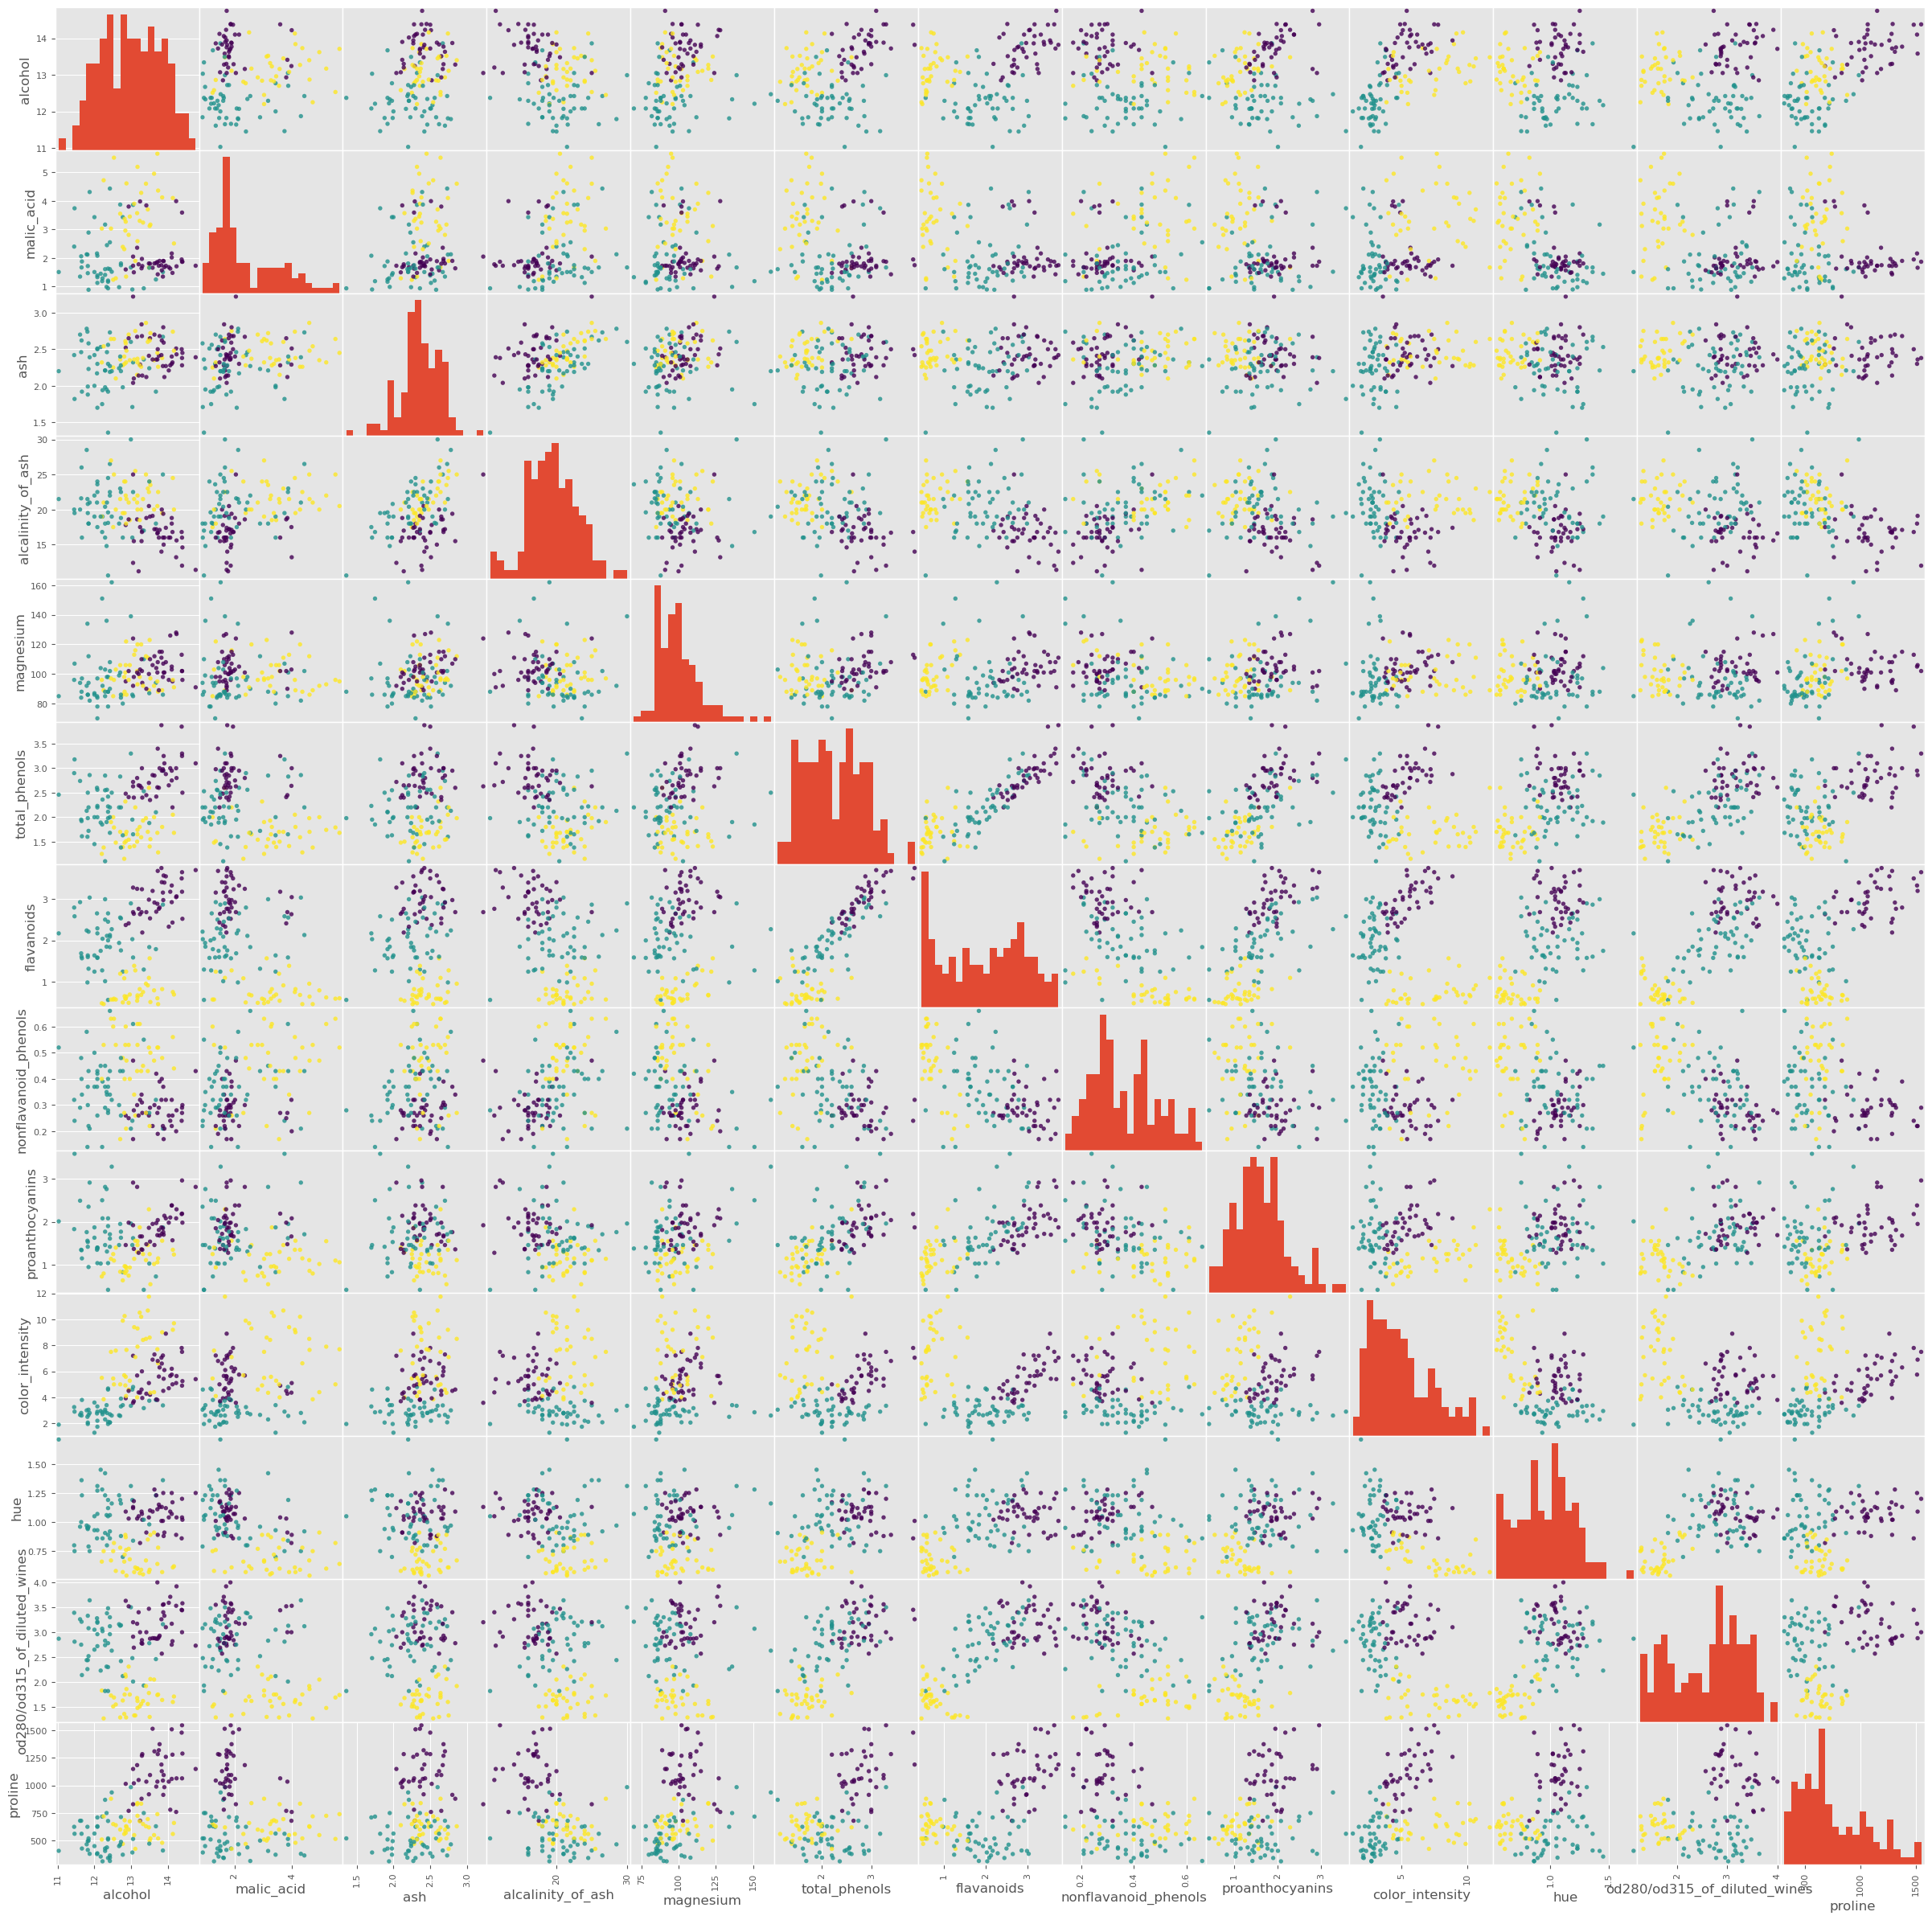

In [7]:
#Visualize pair plots of train dataset
wine_dataframe = pd.DataFrame(X_train, columns=wine_dataset.feature_names)

#Create scatter matrix from dataframe
pd.plotting.scatter_matrix(wine_dataframe, c=y_train, figsize=(30,30),
                           marker='.',hist_kwds={'bins':20}, s=60,
                           alpha=.8);

In [8]:
#KNN Training

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
#Evaluating the model using the test dataset

y_pred = knn.predict(X_test)
print('Test set prediction:\n', y_pred)

Test set prediction:
 [0 1 1 0 1 1 0 2 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 2 0 0 0 1
 1 1 0 2 0 1 2 1 2 1 0 2 0 2 2 0 2]


In [10]:
#Accuracy of the model

print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))
#print("Test set score: {:.2f}".format(np.mean(y_test == y_pred))) #alternative method

Test set score: 0.72


In [11]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,99)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

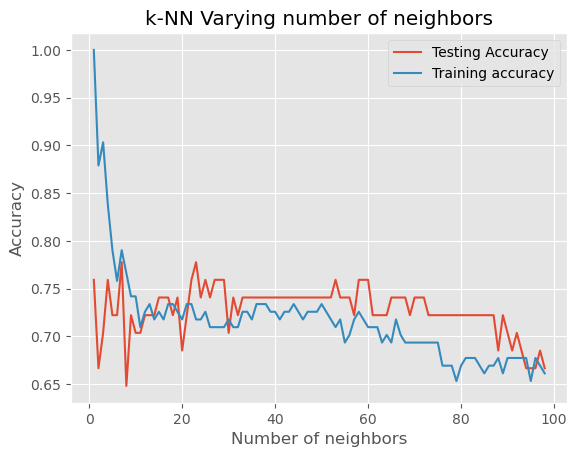

In [12]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
#https://www.kaggle.com/code/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook

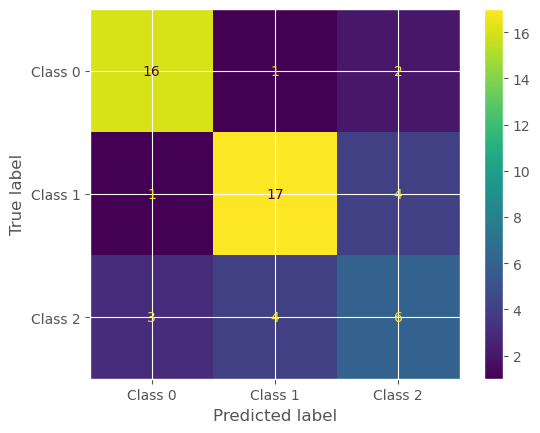

In [14]:
#Create and plot confusion matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Class 0', 'Class 1', 'Class 2'])

cm_display.plot()
plt.show()